In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

# Configure Environment
warnings.filterwarnings('ignore')  # Suppress warnings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load Processed Dataset
data_path = r'C:\Users\KiuStudnet\PycharmProjects\Student_Depression_Analysis\data\processed_v1_student_depression.csv'
data = pd.read_csv(data_path)
print(f"Dataset loaded successfully! Shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")

Dataset loaded successfully! Shape: (27901, 18)
Columns: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']



Numerical Variables Summary:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Depression
count,27901.00,27901.00,27901.00,27901.0,27901.00,27901.00,27901.0,27883.00,27901.00,27901.00,27901.00
mean,70442.15,25.82,3.14,0.0,7.66,2.94,0.0,2.40,7.16,3.14,0.59
std,40641.18,4.89,1.38,0.0,1.47,1.36,0.0,1.13,3.71,1.44,0.49
min,2.00,18.00,0.00,0.0,2.35,0.00,0.0,1.00,0.00,1.00,0.00
25%,35039.00,21.00,2.00,0.0,6.29,2.00,0.0,1.00,4.00,2.00,0.00
50%,70684.00,25.00,3.00,0.0,7.77,3.00,0.0,2.00,8.00,3.00,1.00
75%,105818.00,30.00,4.00,0.0,8.92,4.00,0.0,3.00,10.00,4.00,1.00
max,140699.00,43.50,5.00,0.0,10.00,5.00,0.0,4.00,12.00,5.00,1.00



Categorical Variables Summary:

Gender Distribution:


,Gender,count
0,Male,15547
1,Female,12354


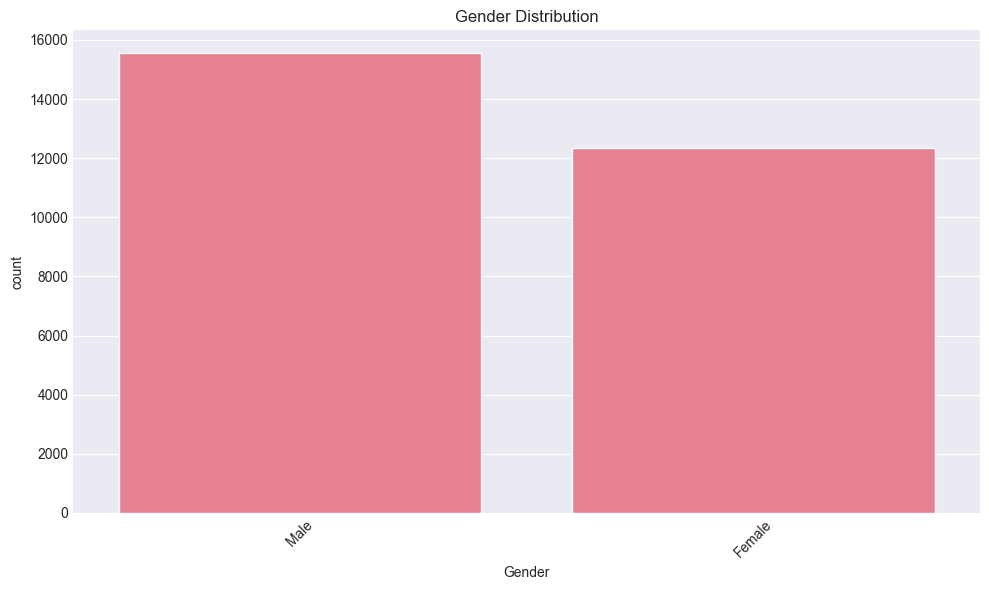


City Distribution:


,City,count
0,Kalyan,1570
1,Srinagar,1372
2,Hyderabad,1340
3,Vasai-Virar,1290
4,Lucknow,1155
5,Thane,1139
6,Ludhiana,1111
7,Agra,1094
8,Surat,1078
9,Kolkata,1066


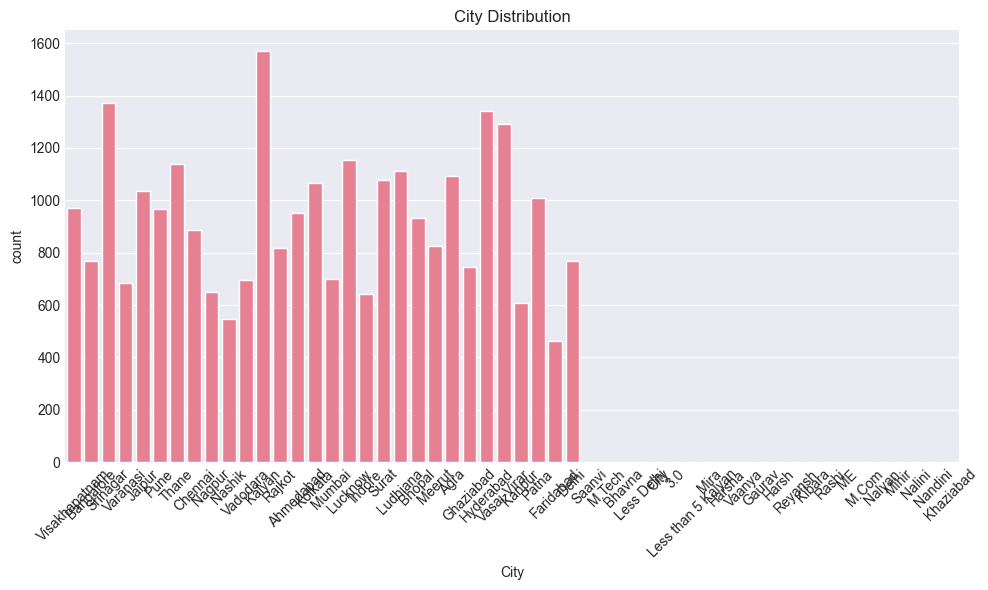


Profession Distribution:


,Profession,count
0,Student,27870
1,Architect,8
2,Teacher,6
3,Digital Marketer,3
4,Chef,2
5,Content Writer,2
6,Pharmacist,2
7,Doctor,2
8,UX/UI Designer,1
9,Civil Engineer,1


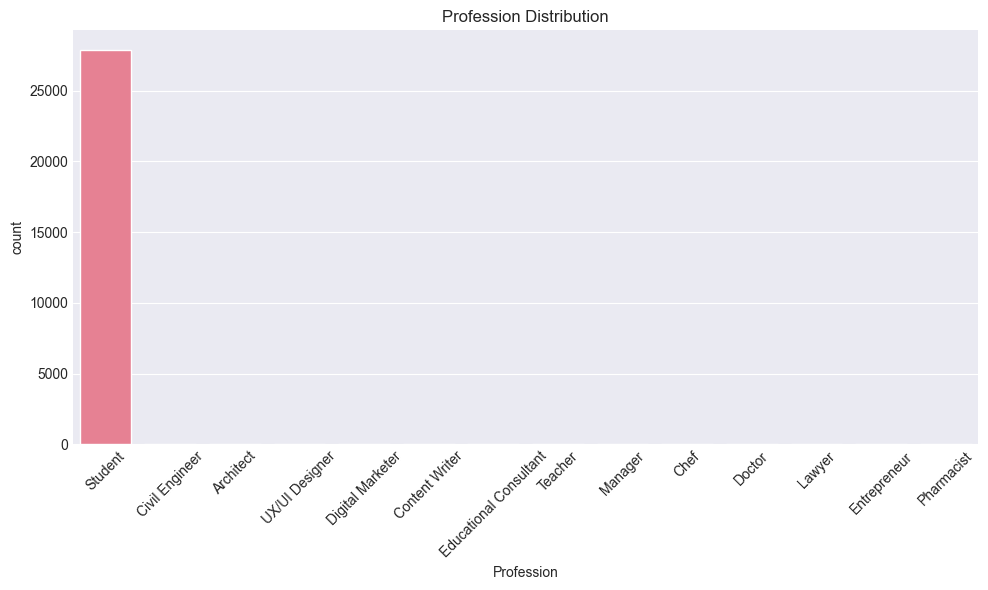


Dietary Habits Distribution:


,Dietary Habits,count
0,Unhealthy,10317
1,Moderate,9921
2,Healthy,7651
3,Others,12


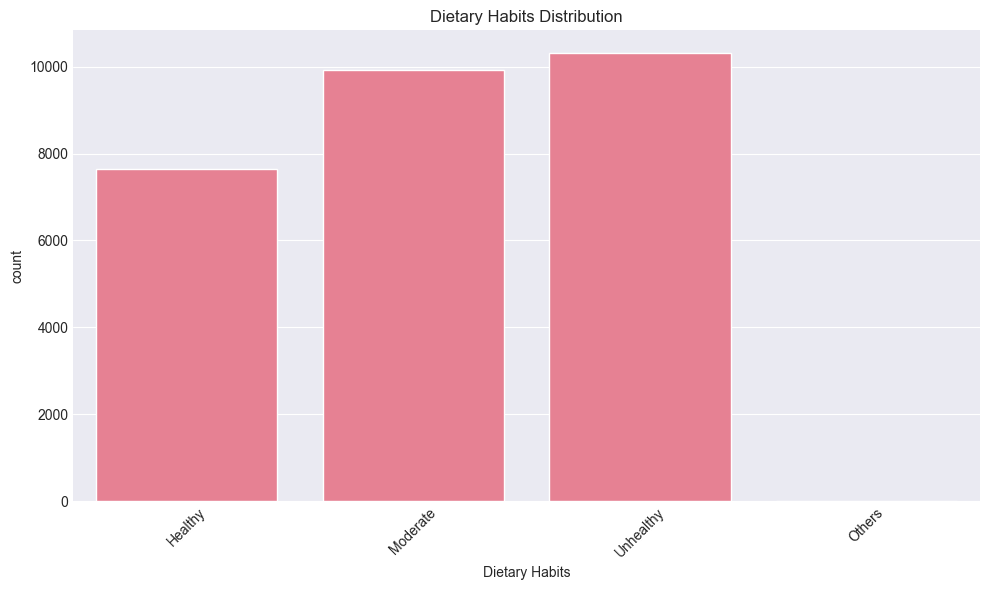


Degree Distribution:


,Degree,count
0,Class 12,6080
1,B.Ed,1867
2,B.Com,1506
3,B.Arch,1478
4,BCA,1433
5,MSc,1190
6,B.Tech,1152
7,MCA,1044
8,M.Tech,1022
9,BHM,925


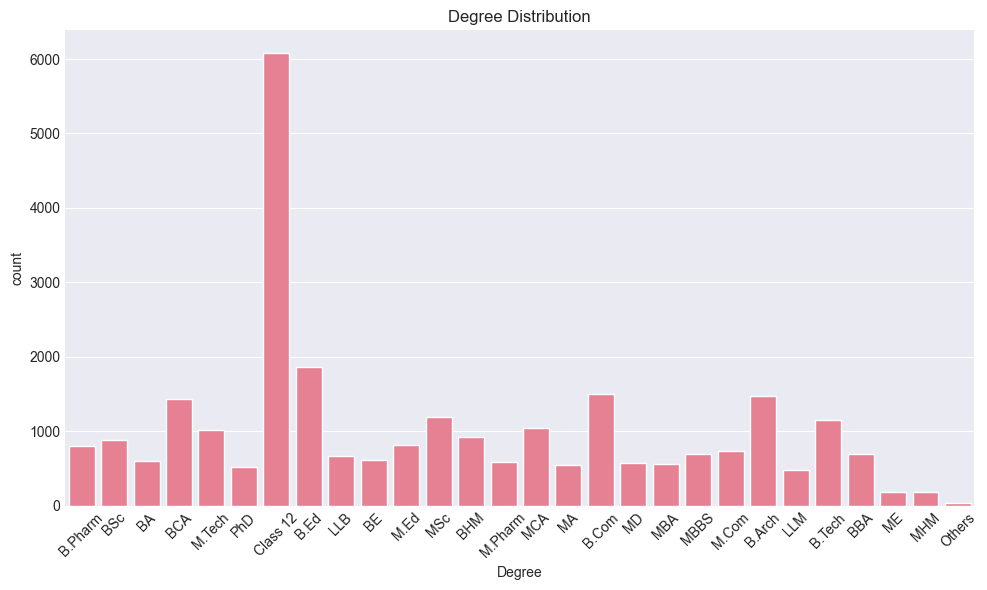


Have you ever had suicidal thoughts ? Distribution:


,Have you ever had suicidal thoughts ?,count
0,Yes,17656
1,No,10245


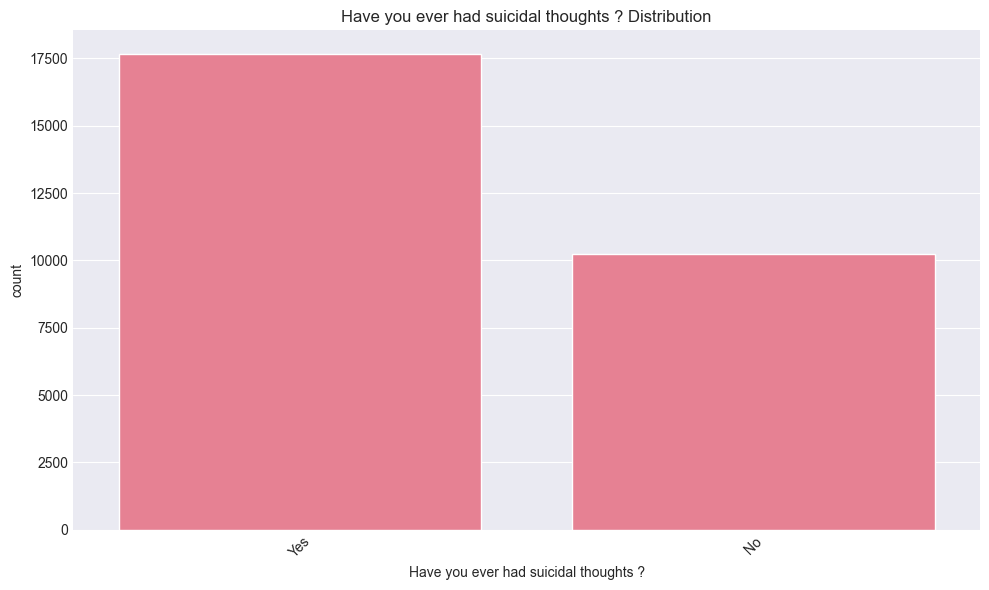


Family History of Mental Illness Distribution:


,Family History of Mental Illness,count
0,No,14398
1,Yes,13503


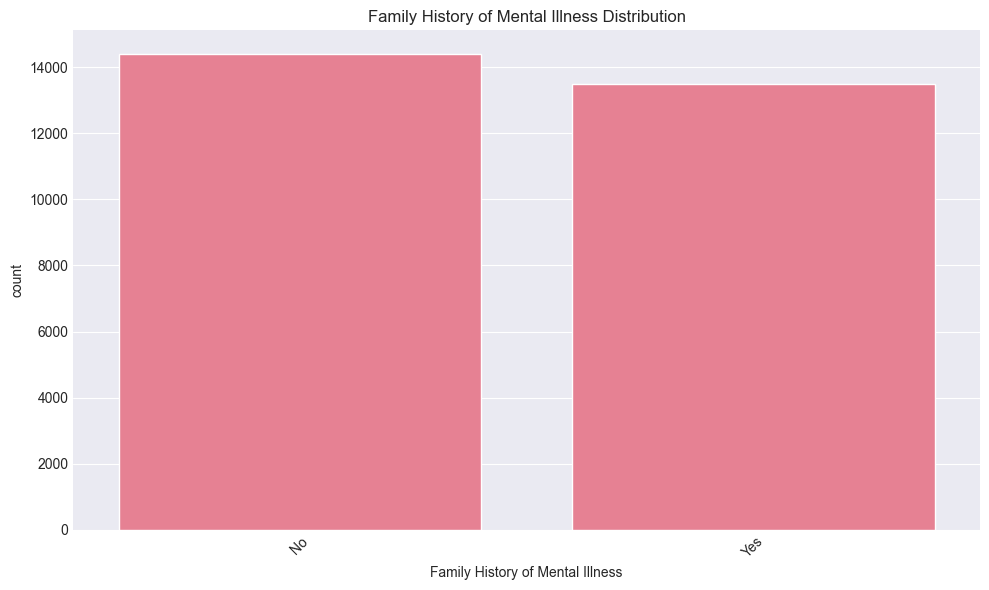

In [3]:
# Summary Statistics
print("\nNumerical Variables Summary:")
display(data.describe().round(2))

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Variables Summary:")
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    display(data[col].value_counts().reset_index())
    sns.countplot(data=data, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Constant Columns Removed: ['Work Pressure', 'Job Satisfaction']


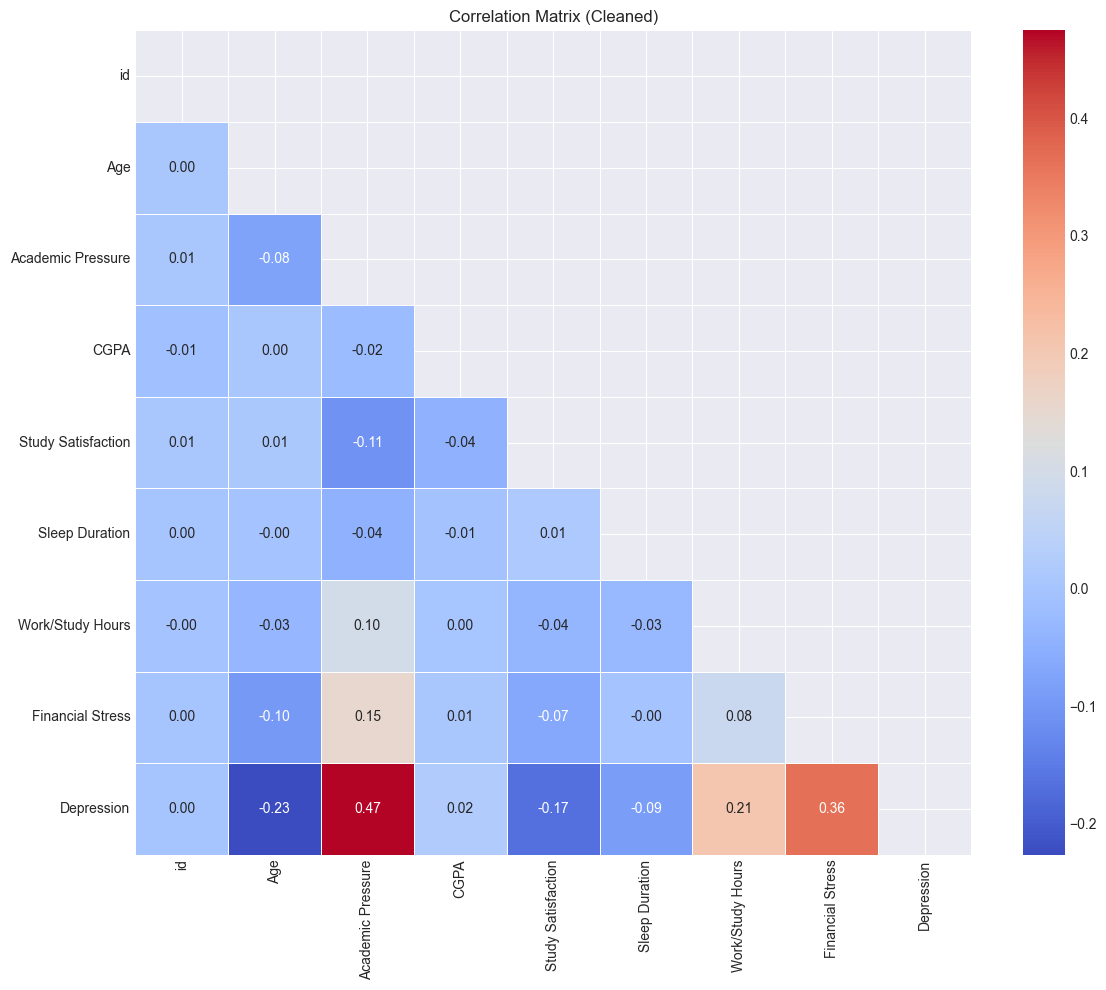


Significant Correlations (|r| > 0.3):
Academic Pressure  Depression           0.474835
Depression         Academic Pressure    0.474835
Financial Stress   Depression           0.363574
Depression         Financial Stress     0.363574
dtype: float64


In [4]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Remove constant columns (with zero variance)
constant_columns = numeric_data.columns[numeric_data.nunique() <= 1]
print(f"Constant Columns Removed: {constant_columns.tolist()}")
numeric_data = numeric_data.drop(columns=constant_columns)

# Handle missing values (optional: fill or drop)
numeric_data = numeric_data.fillna(numeric_data.median())  # Replace NaNs with median

# Recompute the correlation matrix
correlation = numeric_data.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Cleaned)')
plt.tight_layout()
plt.show()

# Identify significant correlations
significant_corr = correlation.unstack().dropna()
significant_corr = significant_corr[(abs(significant_corr) > 0.3) & (significant_corr != 1.0)]
print("\nSignificant Correlations (|r| > 0.3):")
print(significant_corr.sort_values(ascending=False))


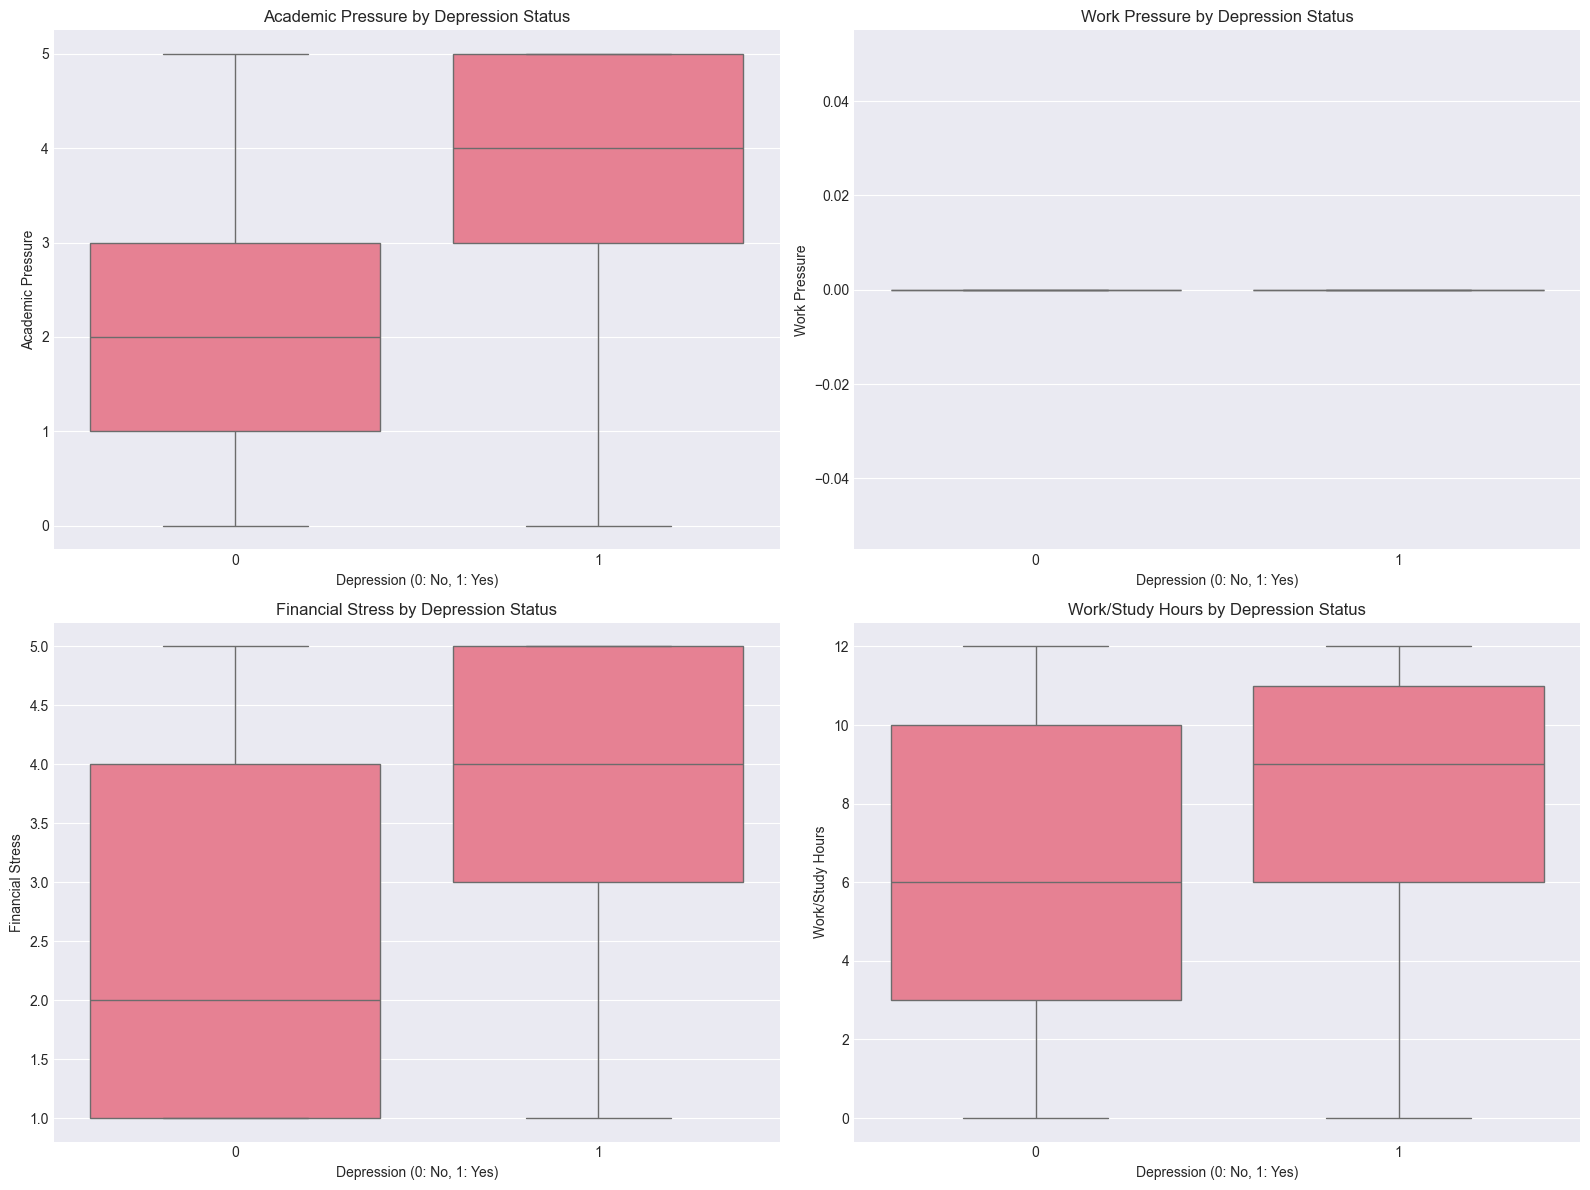

In [5]:
# Depression Risk Factors Analysis
risk_factors = ['Academic Pressure', 'Work Pressure', 'Financial Stress', 'Work/Study Hours']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for ax, factor in zip(axes.flat, risk_factors):
    sns.boxplot(x='Depression', y=factor, data=data, ax=ax)
    ax.set_title(f'{factor} by Depression Status')
    ax.set_xlabel('Depression (0: No, 1: Yes)')

plt.tight_layout()
plt.show()

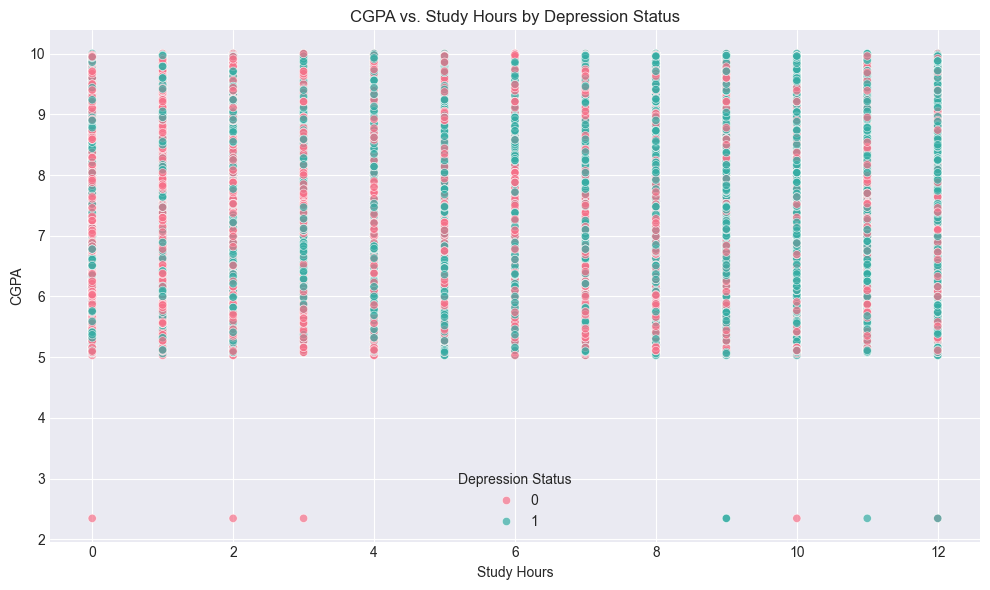

In [6]:
# Scatter Plot: CGPA vs. Study Hours by Depression Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Work/Study Hours', y='CGPA', hue='Depression', palette='husl', alpha=0.7)
plt.title('CGPA vs. Study Hours by Depression Status')
plt.xlabel('Study Hours')
plt.ylabel('CGPA')
plt.legend(title='Depression Status')
plt.tight_layout()
plt.show()


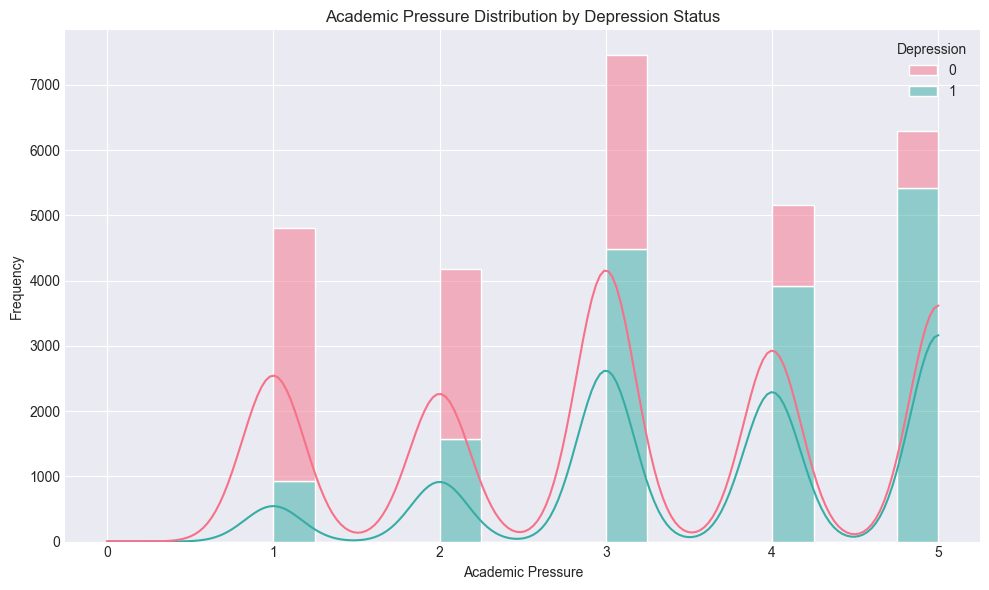

In [7]:
# Histogram: Distribution of Academic Pressure by Depression Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Academic Pressure', hue='Depression', kde=True, bins=20, palette='husl', multiple="stack")
plt.title('Academic Pressure Distribution by Depression Status')
plt.xlabel('Academic Pressure')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


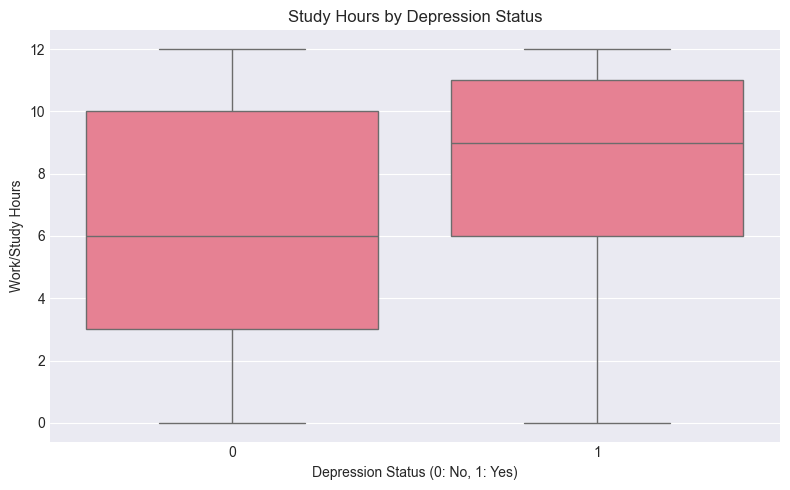

In [8]:
def plot_box(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_box(data, 'Depression', 'Work/Study Hours', 
         'Study Hours by Depression Status', 
         'Depression Status (0: No, 1: Yes)', 
         'Work/Study Hours')


In [9]:
def mann_whitney_test(data, column, group_col='Depression', alpha=0.05):
    group1 = data[data[group_col] == 0][column]
    group2 = data[data[group_col] == 1][column]
    
    stat, p_value = stats.mannwhitneyu(group1, group2)
    significant = p_value < alpha
    
    return {
        'statistic': stat,
        'p_value': p_value,
        'significant': significant
    }
result = mann_whitney_test(data, 'CGPA')
print(f"CGPA Mann-Whitney U Test: p-value = {result['p_value']:.4f}, Significant: {result['significant']}")


CGPA Mann-Whitney U Test: p-value = 0.0003, Significant: True


In [10]:
# Statistical Tests for Risk Factors
for factor in risk_factors:
    stat, p_value = stats.mannwhitneyu(
        data[data['Depression'] == 1][factor],
        data[data['Depression'] == 0][factor]
    )
    print(f"\n{factor}: Mann-Whitney U Test p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Significant difference between groups (p < 0.05)")



Academic Pressure: Mann-Whitney U Test p-value = 0.0000
Significant difference between groups (p < 0.05)

Work Pressure: Mann-Whitney U Test p-value = 1.0000

Financial Stress: Mann-Whitney U Test p-value = 0.0000
Significant difference between groups (p < 0.05)

Work/Study Hours: Mann-Whitney U Test p-value = 0.0000
Significant difference between groups (p < 0.05)


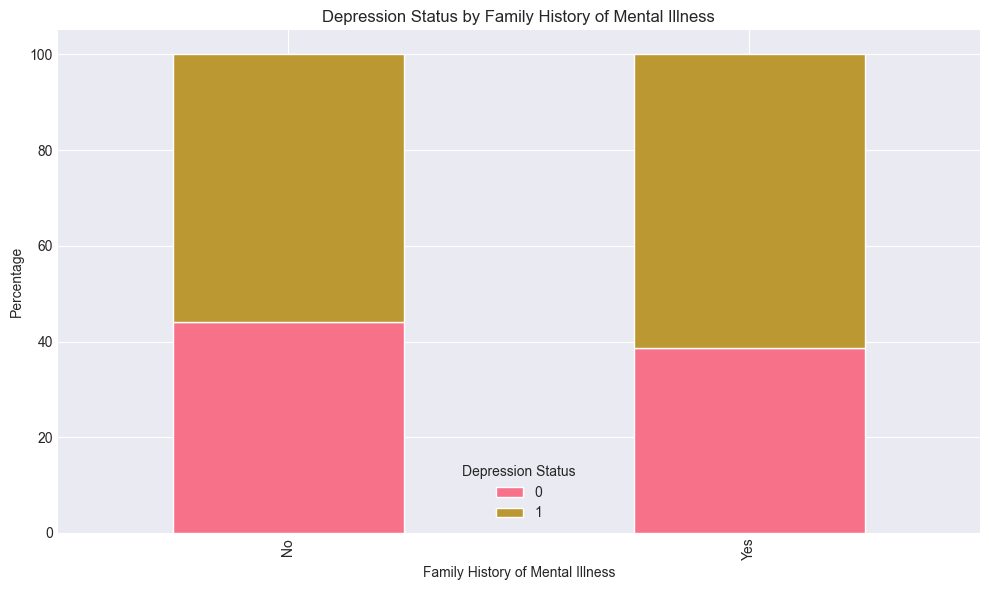


Family History of Mental Illness: Chi-Square Test p-value = 0.0000
Significant association with Depression (p < 0.05)


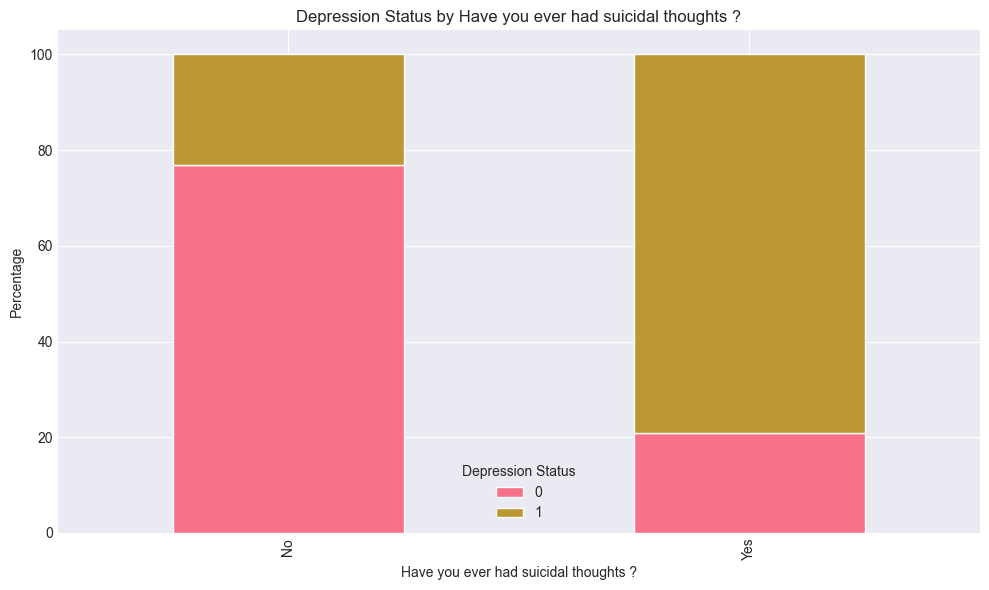


Have you ever had suicidal thoughts ?: Chi-Square Test p-value = 0.0000
Significant association with Depression (p < 0.05)


In [11]:
# Mental Health Analysis
mental_health_cols = ['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
for col in mental_health_cols:
    if col in data.columns:
        cross_tab = pd.crosstab(data[col], data['Depression'], normalize='index') * 100
        cross_tab.plot(kind='bar', stacked=True)
        plt.title(f'Depression Status by {col}')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        plt.legend(title='Depression Status')
        plt.tight_layout()
        plt.show()
        
        chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(data[col], data['Depression']))
        print(f"\n{col}: Chi-Square Test p-value = {p_value:.4f}")
        if p_value < 0.05:
            print(f"Significant association with Depression (p < 0.05)")


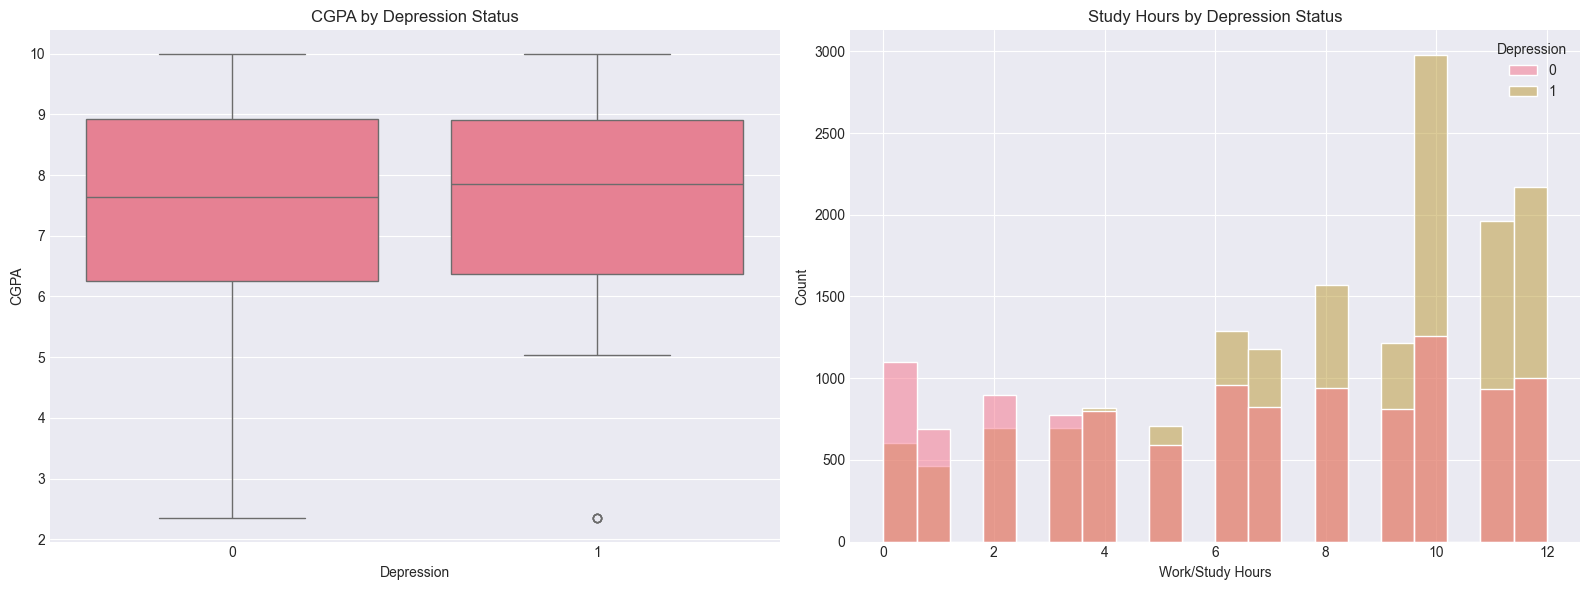

In [12]:
# Academic Performance Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='Depression', y='CGPA', data=data, ax=axes[0])
axes[0].set_title('CGPA by Depression Status')

sns.histplot(data=data, x='Work/Study Hours', hue='Depression', bins=20, ax=axes[1])
axes[1].set_title('Study Hours by Depression Status')

plt.tight_layout()
plt.show()

In [14]:
# Save Updated Dataset
output_path = r'C:\Users\KiuStudnet\PycharmProjects\Student_Depression_Analysis\data\processed_v1_student_depression.csv'
data.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved at: {output_path}")


Processed dataset saved at: C:\Users\KiuStudnet\PycharmProjects\Student_Depression_Analysis\data\processed_v1_student_depression.csv
